<a href="https://colab.research.google.com/github/peterbmob/DHMVADoE/blob/main/Excercises/FA_wine_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Factor Analysis

Adapted from The E-Learning project SOGA-Py was developed at the Department of Earth Sciences by Annette Rudolph, Joachim Krois and Kai Hartmann.

Factor analysis is an application of latent variable models. The purpose of the analysis is to determine how many latent variables are needed to explain the correlations between the manifest variable, to interpret them and, sometimes, to predict the values of the latent variables which have given rise to the manifest variables.

The basic idea behind factor analysis is that we investigate a multivariate feature space covered by a set of observable variables and that we describe the variability and correlation among the observed variables in terms of a potentially lower number of unobserved variables denoted as factors.

There are two main branches of factor analysis:

- [Confirmatory factor analysis (CFA)](https://en.wikipedia.org/wiki/Confirmatory_factor_analysis)

- [Exploratory factor analysis (EFA)](https://en.wikipedia.org/wiki/Exploratory_factor_analysis)

In EFA we allow all *m* factors to be related to all *p* observed variables. Thus, one can say that we are exploring which factors relate to which observed variables. Whereas in CFA we know, or assume, based on an a priori hypothesized model that *k* observed variables are related to a particular factor (latent variable). Thus, one can say we try to confirm if a set of *k* observed variables is in fact related to a particular factor.

Read more on the math behind Factor analysis on the studium page.

In the following tutorial, we focus on **exploratory factor analysis**.

# Factor Analysis in Python


In this example we compute a factor analysis, employing the `scikit-learn` library.

We assume that our data was generated by a linear transformation of a lower dimensional data set, with an overlay of white noise. The factor analysis allows us to retrieve these underlying factors and thus to lower the dimensionality of our data.

Let's import the needed tools and get going. We will give further explanation along the way.


In [1]:
from pandas import read_csv, Series, DataFrame
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## The data set
Let us get our hands dirty and apply a factor analysis on a the food-texture data set. We already discussed the data set in the section on principal component analysis, so you are probably familiar with the data set.

For convenience, we use gain the "pastry" dataset we earlier encountered in the PCA tutorial.

In [58]:
food = read_csv("winequality-red.csv",sep=';')
#food=food.loc[:,'fixed acidity':'alcohol']
food.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data set consists of 50 rows (observations) and 5 columns (features/variables). The features are:

- Oil: percentage oil in the pastry
- Density: the product’s density (the higher the number, the more dense the product)
- Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
- Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures.
- Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

## The FactorAnalysis class of scikit-learn
The class FactorAnalysis of the scikit-learn package, enables many methods around Factor analysis. When instantiating the class, we can pass it the desired number of factors.



```
FactorAnalysis(n_components = <factors>)
```
Replace $<factors>$ with the amount of desired factors.

With this class we can perform a maximum-likelihood factor analysis on a covariance matrix or data matrix, specifying the desired number of factors. By an additional argument `rotation` the transformation of the factors may be specified to be either `varimax`or `quartimax`, two types of orthogonal rotation or None (default) for no rotation.

Getting a reasonable value for the amount of factors desired is a tricky aspect of factor analysis. If we already have some understanding of the system that created our data, we may make an make an educated guess about the number of latent variables.

If we do not know much about out data other than that the number of variables is not too large, we may simply try several values to initialize the model. In most cases though and to do our due dilligence, we should use a more sophisticated approach and perform a principal component analysis (PCA) (as we already did) and get a good initial estimate of the number of factors.

Since we have already explained the PCA, we will not repeat it here and just make a guess and set the number of factor to be factors = 2. Furthermore, we try the analysis with the rotation set to varimax and with the default value rotation = None.

Let's compute this and plot it using matplotlib.

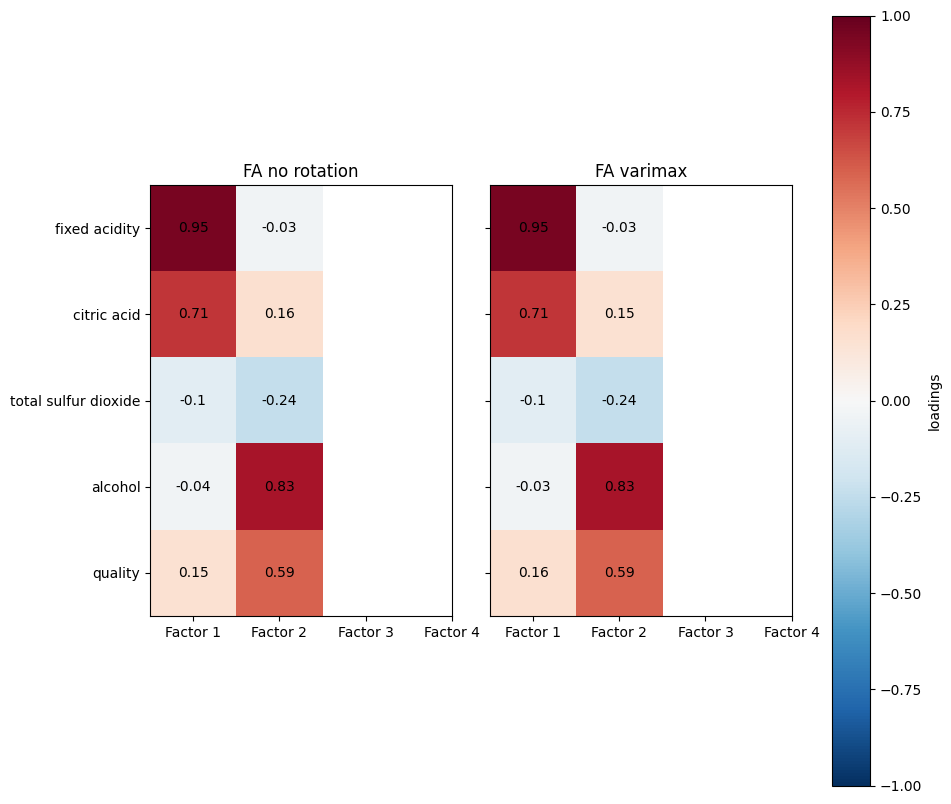

In [63]:
X = StandardScaler().fit_transform(food)  # Standardize the data
factors = 2 # BAsed on previous PCA
#  a list of 2 tuples containing titles for and instances of or class
fas = [
    ("FA no rotation", FactorAnalysis(n_components = factors)),
    ("FA varimax", FactorAnalysis(n_components = factors, rotation="varimax")),
]

#  Let's prepare some plots on one canvas (subplots)
fig, axes = plt.subplots(ncols=len(fas), figsize=(10, 8))

'''
And loop over the variants of our analysis `fas`, zipped with the
plot axes `axes`
'''
for ax, (title, fa) in zip(axes, fas):
    #  Fit the model to the standardized food data
    fa = fa.fit(X)
    #  and transpose the component (loading) matrix
    factor_matrix = fa.components_.T
    #  Plot the data as a heat map
    im = ax.imshow(factor_matrix, cmap="RdBu_r", vmax=1, vmin=-1)
    #  and add the corresponding value to the center of each cell
    for (i,j), z in np.ndenumerate(factor_matrix):
        ax.text(j, i, str(z.round(2)), ha="center", va="center")
    #  Tell matplotlib about the metadata of the plot
    ax.set_yticks(np.arange(len(food.columns)))
    if ax.get_subplotspec().is_first_col():
        ax.set_yticklabels(food.columns)
    else:
        ax.set_yticklabels([])
    ax.set_title(title)
    ax.set_xticks([0, 1,2,3])
    ax.set_xticklabels(["Factor 1", "Factor 2","Factor 3","Factor 4"])
    #  and squeeze the axes tight, to save space
    plt.tight_layout()

#  and add a colorbar
cb = fig.colorbar(im, ax=axes, location='right', label="loadings")
#  show us the plot
plt.show()

## Interpretation of the results
Before we interpret the results of the factor analysis, let us recall the basic idea behind it. Factor analysis creates **linear combinations of factors** to abstract the variable’s underlying **communality**. This reduces the amount of factors in the data set, while preserving most of the variance.

This allows us to aggregate a large number of observable variables in a model to **represent an underlying concept**, making it easier to comprehend the data.

The variability in a data set **X**, is given by **Σ**, and its estimate $\hat{\sum}$ is composed of the variability explained by a **linear combination of the factors** we call **communality**, $\hat{\Lambda} \hat{\Lambda}^T$,  and of the remaining variability that can not be explained by a linear combination of the factors, namley the **uniqueness**, $\hat{\Psi}$.
$$ \hat{\sum} = \hat{\Lambda} \hat{\Lambda}^T + \hat{\Psi} $$

Recall that $\hat{\Lambda}$ is the loading matrix.

**Now let's have a look at our results:**

In the plot above we can see the **loadings**, which range from −1 to 1. The loadings are the contribution of each original variable to the factor. Variables with loading values further away from **0** have a larger part of their variability factor.

Now we will check the **uniqueness** for of each variable. Note that we only use the varimax rotation method, going forward.

The next plot is generated straight from a `PandasSeries`, using the `.plot()` method. This provides easy access to quick plots.

<Axes: ylabel='Uniqueness'>

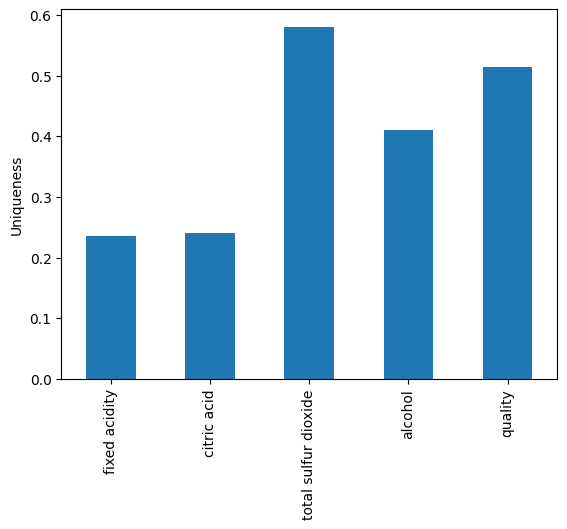

In [64]:
fa = FactorAnalysis(n_components = 4, rotation="varimax")
fa.fit(X)
uniqueness = Series(fa.noise_variance_, index=food.columns)
uniqueness.plot(
    kind="bar",
    ylabel="Uniqueness"
)

In [61]:
#food=food.loc[:,['fixed acidity','citric acid','chlorides','total sulfur dioxide','pH', 'alcohol', 'quality']]
food=food.loc[:,['fixed acidity','citric acid','total sulfur dioxide','alcohol', 'quality']]


The **uniqueness**, which ranges from 0 to 1. It is, sometimes also referred to as (white) noise, corresponds to the proportion of variability that can not be explained by a linear combination of the factors. This part is represented by the $\hat{\Psi}$ in the equation above. A high uniqueness for a variable indicates that the factors do not account well for its variance.

Opposing the uniquess, stands the **communality**:

<Axes: ylabel='communality'>

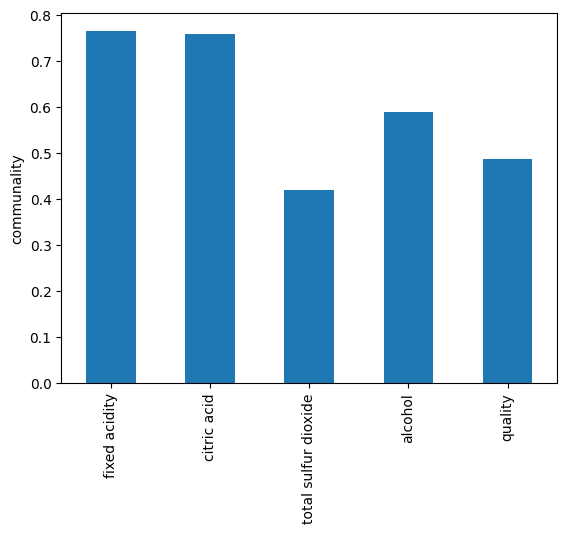

In [65]:
# Communality
communality = Series(np.square(fa.components_.T).sum(axis=1), index=food.columns)
communality.plot(
    kind="bar",
    ylabel="communality"
)

By squaring the loading we can compute the **fraction of the variable’s total variance explained by the factors**. This proportion of the variability is denoted as **communality**.

A way way to calculate the the uniqueness, when you already computed the communlity is to subtract it from 1. **An appropriate factor model results in low values for uniqueness and high values for communality**. So if we see bad results for our model, we could try a different number of underlying factors (latent variables).

<Axes: ylabel='uniqueness'>

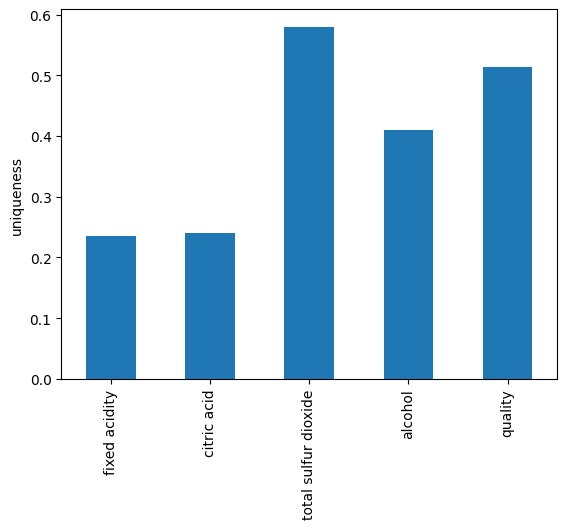

In [66]:
#and back to uniqueness
(1 - communality).plot(kind="bar", ylabel="uniqueness")

Recall the factor analysis model:

$$ \hat{\sum} = \hat{\Lambda} \hat{\Lambda}^T + \hat{\Psi} $$

Using our factor model, we may calculate
$\hat{\sum}$ and compare it to the observed correlation matrix, **S**, by simple matrix algebra.

We use numpy to perform fast and efficient math operations. Note: We can also use pandas, since it "wraps" around numpy, basically just forwarding our commands to the library.

In [67]:
# the word 'lambda' is reserved for a python-operator, so we use the underscore at the end
lambda_ = fa.components_
psi = np.diag(uniqueness)
s = np.corrcoef(np.transpose(X))
sigma = np.matmul(lambda_.T, lambda_) + psi
residuals = (s - sigma)

We subtracted the fitted correlation matrix $\hat{\sum}(sigma)$ from the observed correlation matrix **S**. The resulting matrix is called the residual matrix. Numbers close to `0` indicate that our factor model is a good representation of the underlying system. Now lets plot the results.

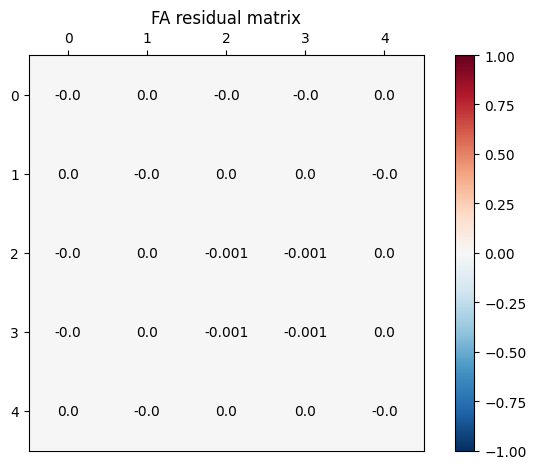

In [68]:
ax = plt.axes()
im = ax.imshow(residuals, cmap="RdBu_r", vmin=-1, vmax=1)
ax.tick_params(axis="x", bottom=False, labelbottom=False, top=True, labeltop=True)
#ax.set_xticks(range(5))
#ax.set_xticklabels(food.columns)
#ax.set_yticks(range(5))
#ax.set_yticklabels(food.columns)
for (i,j), z in np.ndenumerate(residuals):
    ax.text(j, i, str(z.round(3)), ha="center", va="center")

fig.colorbar(im, ax=ax, location='right')
ax.set_title("FA residual matrix")
plt.tight_layout()

## Interpretation of the factors
The purpose of a **rotation** is to produce **more extreme loadings**. The idea behind this is to give meaning to the factors. This can help with their interpretation. From a mathematical viewpoint, there is no difference between a rotated and unrotated matrix. **The fitted model is the same, the uniquenesses are the same**, and the proportion of variance explained is the same.

Here we fit three factor models, one with `no rotation`, one with `varimax` rotation, and one with `quartimax` rotation. We then make a `scatter plot` of the first and second loadings.

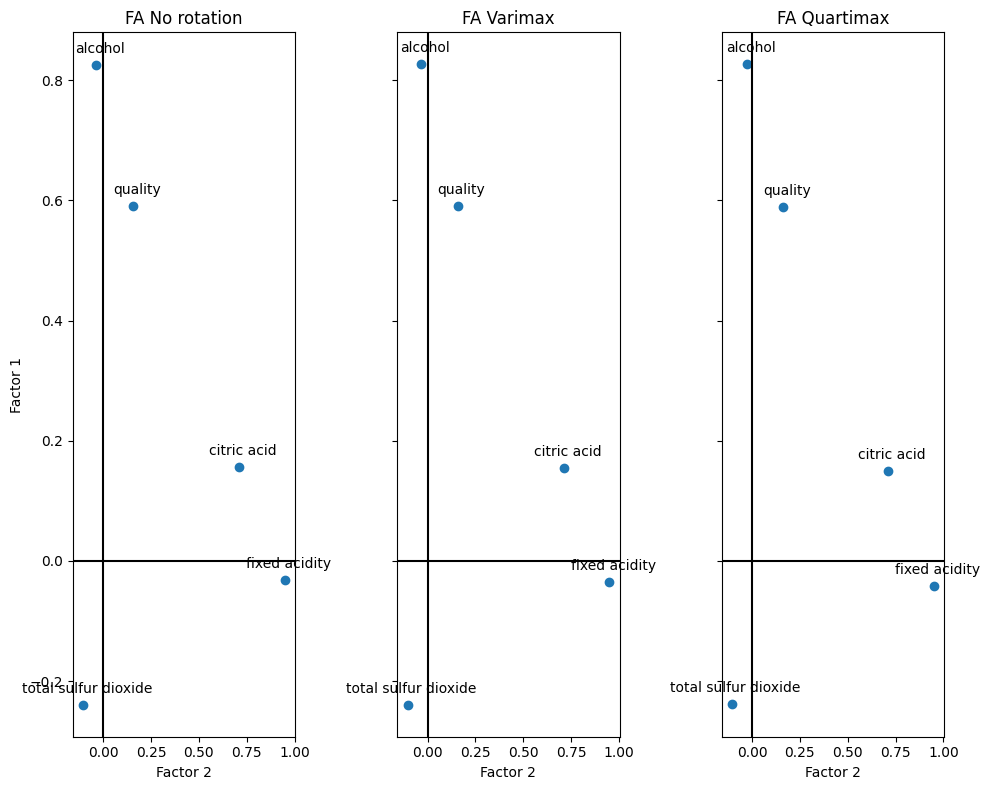

In [69]:
methods = [
    ("FA No rotation", FactorAnalysis(2,)),
    ("FA Varimax", FactorAnalysis(2, rotation="varimax")),
    ("FA Quartimax", FactorAnalysis(2, rotation="quartimax")),
]
fig, axes = plt.subplots(ncols=3, figsize=(10, 8), sharex=True, sharey=True)

for ax, (method, fa) in zip(axes, methods):
    fa = fa.fit(X)

    components = fa.components_

    vmax = np.abs(components).max()
    ax.scatter(components[0,:], components[1, :])
    ax.axhline(0, -1, 1, color='k')
    ax.axvline(0, -1, 1, color='k')
    for i,j, z in zip(components[0, :], components[1, :], food.columns):
        ax.text(i+.02, j+.02, str(z), ha="center")
    ax.set_title(str(method))
    if ax.get_subplotspec().is_first_col():
        ax.set_ylabel("Factor 1")
    ax.set_xlabel("Factor 2")

plt.tight_layout()
plt.show()

## What does this mean?
How can I interpret these factors? If two variables have loadings further away from `0` for the same factor, we know they are related. We want to understand the data in order to give meaningful names to the latent variables.

Taking a look at the plot in the middle `FA Varimax` above, it appears that `Factor 1` describes a variable that makes pastry soft, less crisp. This description fits `flaky pastry` rather well.

Whereas the loadings in `Factor 2` show high `density` and little `oil`. This would fit the classification of `hot water crust` pastry